# House Prices - Advanced Regression Techniques

In [382]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import statsmodels.api as sm


In [383]:
#LR
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [384]:
#Random Forest
# Modelling
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree


In [385]:
#Datei einlesen
df = pd.read_csv("train.csv")

### Alle Variablen

In [386]:
#erster Überblick
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [387]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [388]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [389]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Text(171.72222222222234, 0.5, 'Features')

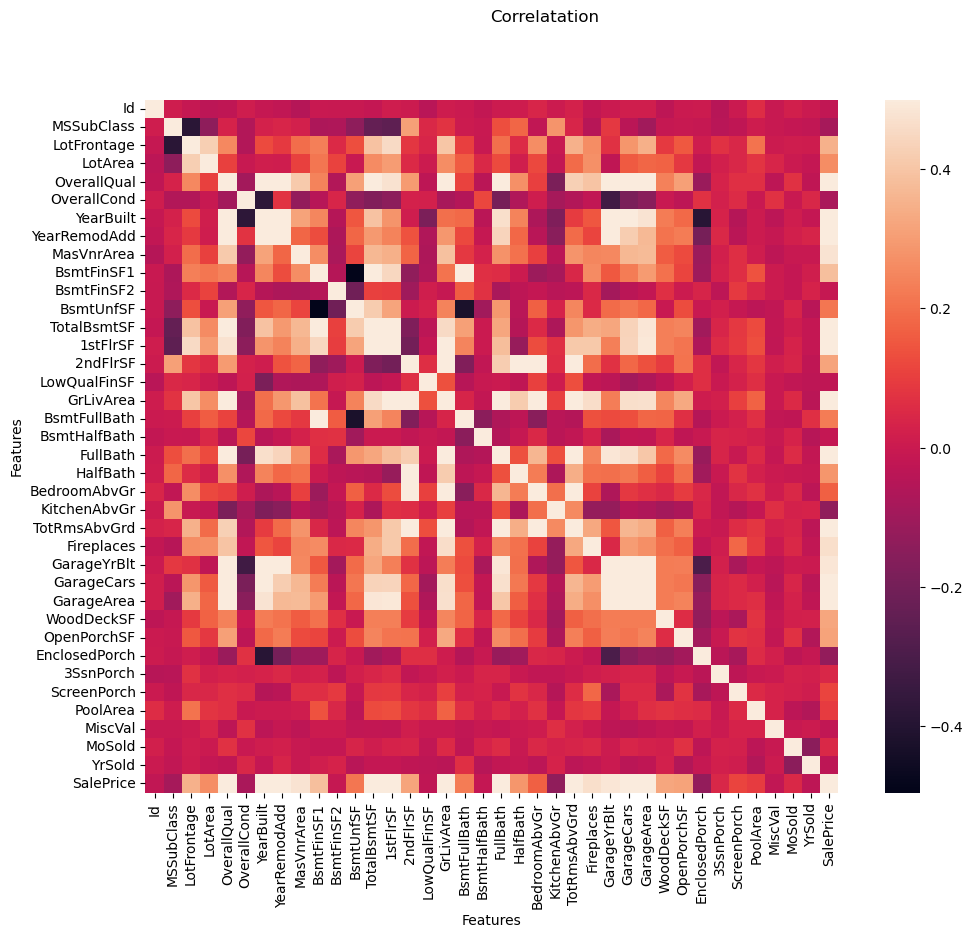

In [390]:
#correlation matrix
corr_mat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, vmax=.5,square=True)

plt.suptitle("Correlatation")
plt.xlabel("Features")
plt.ylabel("Features")

### Haus Variablen

Haus = MSSubClass, BldgType, HouseStyle, YearBuilt, YearRemodAdd

In [391]:
#meine Variablen: 
#Haus = MSSubClass, BldgType, HouseStyle, YearBuilt, YearRemodAdd
#Sale: MoSold, YrSold, SaleType, SaleCondition, SalePrice

haus_columns = df[['MSSubClass', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd']]
print(haus_columns)

haus_columns.info()

haus_columns.describe()

      MSSubClass BldgType HouseStyle  YearBuilt  YearRemodAdd
0             60     1Fam     2Story       2003          2003
1             20     1Fam     1Story       1976          1976
2             60     1Fam     2Story       2001          2002
3             70     1Fam     2Story       1915          1970
4             60     1Fam     2Story       2000          2000
...          ...      ...        ...        ...           ...
1455          60     1Fam     2Story       1999          2000
1456          20     1Fam     1Story       1978          1988
1457          70     1Fam     2Story       1941          2006
1458          20     1Fam     1Story       1950          1996
1459          20     1Fam     1Story       1965          1965

[1460 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 

,MSSubClass,YearBuilt,YearRemodAdd
count,1460.000000,1460.000000,1460.000000
mean,56.897260,1971.267808,1984.865753
std,42.300571,30.202904,20.645407
min,20.000000,1872.000000,1950.000000
25%,20.000000,1954.000000,1967.000000
50%,50.000000,1973.000000,1994.000000
75%,70.000000,2000.000000,2004.000000
max,190.000000,2010.000000,2010.000000


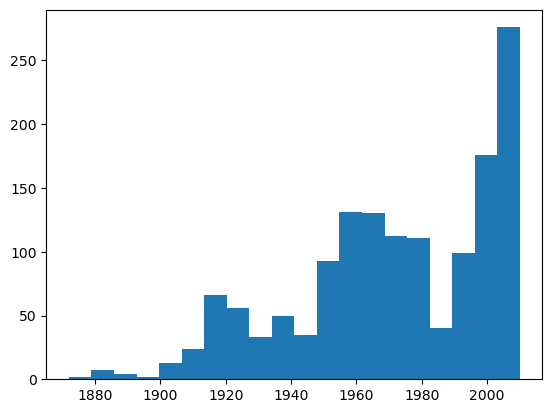

In [392]:
plt.hist(haus_columns['YearBuilt'], bins=20)
plt.show()

In [393]:
fig = px.bar(haus_columns, x='YearBuilt', y='YearRemodAdd')
fig.show()

HouseStyle
1Story        726
2Story        445
1.5Fin        154
SLvl           65
SFoyer         37
1.5Unf         14
2.5Unf         11
2.5Fin          8
dtype: int64


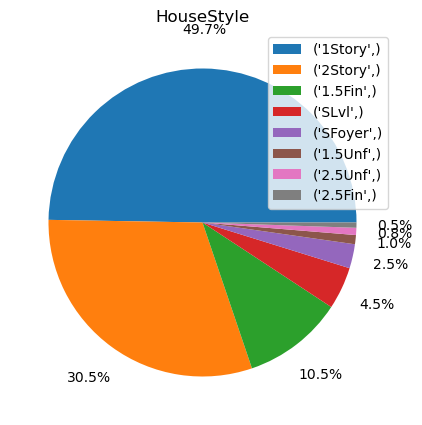

In [394]:
HouseStyle_count = haus_columns[['HouseStyle']].value_counts()
print(HouseStyle_count)

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title("HouseStyle")
ax.pie(HouseStyle_count, autopct='%1.1f%%', pctdistance=1.25)

plt.legend(HouseStyle_count.index)
plt.show()

BldgType
1Fam        1220
TwnhsE       114
Duplex        52
Twnhs         43
2fmCon        31
dtype: int64


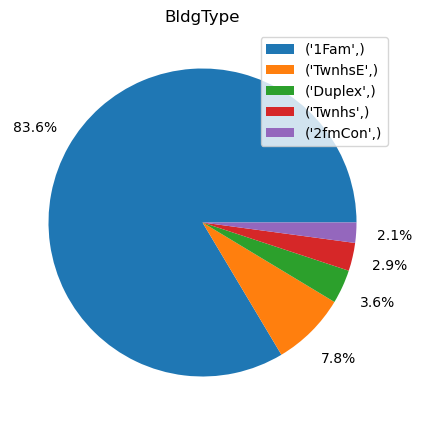

In [395]:
BldgType_count = haus_columns[['BldgType']].value_counts()
print(BldgType_count)

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title("BldgType")
ax.pie(BldgType_count, autopct='%1.1f%%', pctdistance=1.25)

plt.legend(BldgType_count.index)
plt.show()

In [396]:
# Beschreibung Daten
#1Fam	= Single-family Detached
#2FmCon	= Two-family Conversion; originally built as one-family dwelling
#Duplx	= Duplex
#TwnhsE	= Townhouse End Unit
#TwnhsI	= Townhouse Inside Unit

MSSubClass
20            536
60            299
50            144
120            87
30             69
160            63
70             60
80             58
90             52
190            30
85             20
75             16
45             12
180            10
40              4
dtype: int64


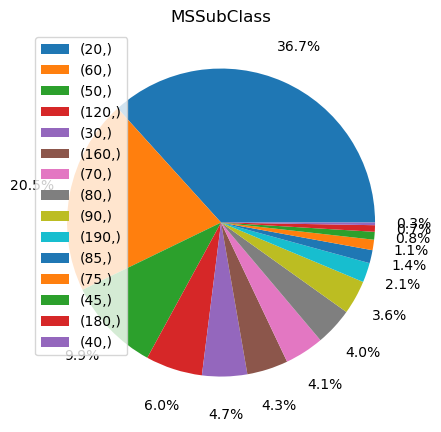

In [397]:
MSSubClass_count = haus_columns[['MSSubClass']].value_counts()
print(MSSubClass_count)

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title("MSSubClass")
ax.pie(MSSubClass_count, autopct='%1.1f%%', pctdistance=1.25)

plt.legend(MSSubClass_count.index)
plt.show()

###nachlesen was genau das nochmal ist

### Sale Variablen

Sale: MoSold, YrSold, SaleType, SaleCondition, SalePrice

In [398]:
sale_columns = df[[ 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]
print(sale_columns)

sale_columns.info()

sale_columns.describe()

      MoSold  YrSold SaleType SaleCondition  SalePrice
0          2    2008       WD        Normal     208500
1          5    2007       WD        Normal     181500
2          9    2008       WD        Normal     223500
3          2    2006       WD       Abnorml     140000
4         12    2008       WD        Normal     250000
...      ...     ...      ...           ...        ...
1455       8    2007       WD        Normal     175000
1456       2    2010       WD        Normal     210000
1457       5    2010       WD        Normal     266500
1458       4    2010       WD        Normal     142125
1459       6    2008       WD        Normal     147500

[1460 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MoSold         1460 non-null   int64 
 1   YrSold         1460 non-null   int64 
 2   SaleType       1460 non-null   o

,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,6.321918,2007.815753,180921.195890
std,2.703626,1.328095,79442.502883
min,1.000000,2006.000000,34900.000000
25%,5.000000,2007.000000,129975.000000
50%,6.000000,2008.000000,163000.000000
75%,8.000000,2009.000000,214000.000000
max,12.000000,2010.000000,755000.000000


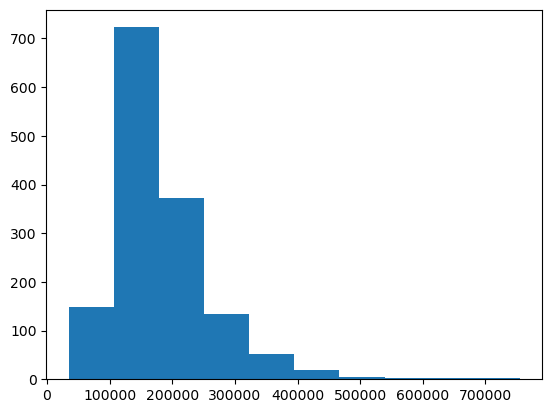

In [399]:
plt.hist(sale_columns[['SalePrice']], bins = 10)
plt.show()

In [400]:
fig = px.scatter(df, x="YearBuilt", y="SalePrice", title='x')
fig.show()

### Daten aufbereiten

In [401]:
def preprocess(df: pd.DataFrame):
  """
  Preprocess data for modeling.
  """

  # Building properties transformations

  df["MSSubClass"] = df["MSSubClass"].replace({
    20: "1S1946-NEW", # 1-STORY 1946 & NEWER ALL STYLES
    30: "1S1945-OLD", # 1-STORY 1945 & OLDER
    40: "1SFIN-ALL", # 1-STORY W/FINISHED ATTIC ALL AGES
    45: "1-1/2UNF-ALL", # 1-1/2 STORY - UNFINISHED ALL AGES
    50: "1-1/2FIN-ALL", # 1-1/2 STORY FINISHED ALL AGES
    60: "2S1946-NEW", # 2-STORY 1946 & NEWER
    70: "2S1945-OLD", # 2-STORY 1945 & OLDER
    75: "2-1/2S-ALL", # 2-1/2 STORY ALL AGES
    80: "SPLT-ALL", # SPLIT OR MULTI-LEVEL
    85: "SPLT-FOYER", # SPLIT FOYER
    90: "DUPLEX-ALL", # DUPLEX - ALL STYLES AND AGES
    120: "1SPUD1946-NEW", # 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    150: "1-1/2SPUD-ALL", # 1-1/2 STORY PUD - ALL AGES
    160: "2SPUD1946-NEW", # 2-STORY PUD - 1946 & NEWER
    180: "PUD-ALL", # PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    190: "2FAM-ALL"}) # 2 FAMILY CONVERSION - ALL STYLES AND AGES

  df["MasVnrType"] = df["MasVnrType"].fillna("XX")

  # Lot properties transformations

  df["LotFrontage"] = df["LotFrontage"].fillna(0)

  # Utility properties transformations

  df["Alley"] = df["Alley"].fillna("XX")

  # Neighborhood properties transformations

  # Garage properties transformations

  df.loc[df["GarageQual"].isna(), "GarageFinish"] = "XX"
  df.loc[df["GarageQual"].isna(), "GarageType"] = "XX"
  df.loc[df["GarageQual"].isna(), "GarageCond"] = "XX"
  df.loc[df["GarageQual"].isna(), "GarageArea"] = 0
  df.loc[df["GarageQual"].isna(), "GarageCars"] = 0
  df.loc[df["GarageQual"].isna(), "GarageYrBlt"] = 0
  df["GarageQual"] = df["GarageQual"].fillna("XX")

  # Supplies properties transformations

  # Basement properties transformations

  df.loc[df["BsmtQual"].isna(), "BsmtCond"] = "XX"
  df.loc[df["BsmtQual"].isna(), "BsmtExposure"] = "XX"
  df.loc[df["BsmtQual"].isna(), "BsmtFinType1"] = "XX"
  df.loc[df["BsmtQual"].isna(), "BsmtFinType2"] = "XX"
  df.loc[df["BsmtQual"].isna(), "BsmtFinSF1"] = 0
  df.loc[df["BsmtQual"].isna(), "BsmtFinSF2"] = 0
  df.loc[df["BsmtQual"].isna(), "BsmtUnfSF"] = 0
  df.loc[df["BsmtQual"].isna(), "TotalBsmtSF"] = 0
  df.loc[df["BsmtQual"].isna(), "BsmtFullBath"] = 0
  df.loc[df["BsmtQual"].isna(), "BsmtHalfBath"] = 0
  df["BsmtQual"] = df["BsmtQual"].fillna("XX")

  # Outdoor area properties transformations

  df["FireplaceQu"] = df["FireplaceQu"].fillna("XX")
  df["PoolQC"] = df["PoolQC"].fillna("XX")
  df["Fence"] = df["Fence"].fillna("XX")
  df["MiscFeature"] = df["MiscFeature"].fillna("XX")

  # Kitchen properties transformations

  # General clean up transformations

  df = df.dropna()

  return df

df = preprocess(df)

In [402]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [403]:
#one hot
df2 = pd.get_dummies(df)
print(df2.shape)

(1449, 318)


In [404]:
df2 = df2.drop(["Id"], axis=1) 

In [405]:
dum = df2.pop("SalePrice")  # Spalte entfernen und in der Variable "SalePrice" speichern
df2.insert(0, "SalePrice", dum)  # Spalte an erster Stelle in das DataFrame einfügen

df2.columns

Index(['SalePrice', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=317)

In [406]:
scaler = StandardScaler()
df3 = scaler.fit_transform(df2)

In [407]:
df3.shape

(1449, 317)

### Daten splitten

In [408]:
train_set, test_set = train_test_split(df3,train_size= 0.7, shuffle=False, random_state=2)

X_train = train_set[:, 1:]  
y_train = train_set[:, 0]  

X_test = test_set[:, 1:] 
y_test = test_set[:, 0] 

#X_train = train_set.drop(["SalePrice"], axis=1)  
#y_train = train_set["SalePrice"].copy()             

#X_test = test_set.drop(["SalePrice"], axis=1)  
#y_test = test_set["SalePrice"].copy()      

In [409]:
X_train.shape

(1014, 316)

In [410]:
X_test.shape

(435, 316)

### LR

#### Muliple Lineare Regression

In [411]:
# reg fit on training
model_reg = linear_model.LinearRegression()
model_reg.fit(X_train, y_train)

# Extrahieren der Koeffizienten (Steigungen)
coefficients = model_reg.coef_

# Extrahieren des y-Achsenabschnitts (Intercept)
intercept = model_reg.intercept_

# Ausgabe der Koeffizienten und des y-Achsenabschnitts
print("Intercept:", intercept)
#print("Coefficients:", coefficients)

Intercept: -230279622570.20148


In [412]:
model_reg.score(X_train, y_train)

0.9374456109880653

In [413]:
#predict value of sale price on the training set
y1_pred = model_reg.predict(X_train)

print(y1_pred)

[ 0.3961792   0.24090576  0.25946045 ...  0.2177124  -0.3381958
  0.48309326]


In [414]:
rmse = np.sqrt(metrics.mean_squared_error(y1_pred,y_train))

print(rmse)

0.2524955847573464


In [415]:
#19884.99161622425

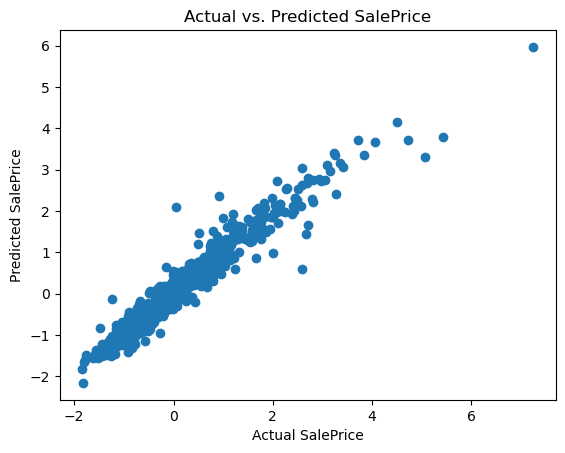

In [416]:
results = pd.DataFrame({"Actual": y_train, "Predicted": y1_pred})

# Plotte ein Streudiagramm der tatsächlichen Werte gegen die vorhergesagten Werte
plt.scatter(results["Actual"], results["Predicted"])
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted SalePrice")
plt.show()

In [417]:
#Test Model:

model_reg2 = linear_model.LinearRegression()
model_reg2.fit(X_test, y_test)

model_reg2.score(X_test, y_test)

0.9659232290183949

In [418]:
y2_pred = model_reg2.predict(X_test)

#print(y2_pred)

In [419]:
rmse2 = np.sqrt(metrics.mean_squared_error(y2_pred,y_test))

print(rmse2)

0.1803184093912078


#### andere LR

In [423]:
# Hinzufügen einer konstanten Spalte zu den unabhängigen Variablen
X_train = sm.add_constant(X_train)

# Erstellen und Anpassen des Modells
model_reg = sm.OLS(y_train, X_train)
results = model_reg.fit()

# Anzeigen der Zusammenfassung der Modellergebnisse
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:32:22   Log-Likelihood:                -38.032
No. Observations:                1014   AIC:                             574.1
Df Residuals:                     765   BIC:                             1800.
Df Model:                         248                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0056      0.013      0.423      0.6

In [421]:
# Hinzufügen einer konstanten Spalte zu den unabhängigen Variablen
X_test = sm.add_constant(X_test)

# Erstellen und Anpassen des Modells
model_reg = sm.OLS(y_test, X_test)
results = model_reg.fit()

# Anzeigen der Zusammenfassung der Modellergebnisse
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     28.58
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           1.64e-95
Time:                        15:32:08   Log-Likelihood:                 145.19
No. Observations:                 435   AIC:                             161.6
Df Residuals:                     209   BIC:                             1083.
Df Model:                         225                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0019      0.020      0.099      0.9

R:
Train: 0.938
Test: 0.969

### Random Forrest

In [424]:
#
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy)

Accuracy: 0.013793103448275862
